## NNの構造把握

In [4]:
#線形変換の例
import numpy as np
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.dot(x, W1)+b1

# print(f"W1={W1}")
# print(f"b1={b1}")
# print(f"x={x}")
# print(f"h={h}")

活性化関数

In [7]:
#シグモイド関数
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [13]:
#入力
x = np.random.randn(10, 2)
#重み，バイサスの設定
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)
#推論
h = np.dot(x, W1)+b1
a = sigmoid(h)
s = np.dot(a, W2) + b2
# print(s)

レイヤとしてのクラス化と順伝播の実装

In [14]:
class Sigmoid:
    def __init__(self):
        self.params = []
    def forward(self, x):
        return 1/(1+np.exp(-x))

In [15]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

2層のNNを構築

In [16]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        #重みとバイアスの初期化
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        #レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        #すべての重みをリストにまとめる
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [17]:
#リスト同士の連結
a=['A', 'B']
a += ['C', 'D']
print(a)

['A', 'B', 'C', 'D']


推論の実行

In [25]:
x = np.random.randn(10,2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

#### 損失関数の実装

クロスエントロピー損失

In [47]:
class Softmax:
    def __init__(self):
        self.params=[]
    def forward(self, x):
        sum = np.sum(np.exp(x), axis=1)
        y = np.exp(x)/sum[: , np.newaxis]
        return y

In [46]:
softmax = Softmax()
y = softmax.forward(s)
print(y)

[ 9.44696686  9.89291697  9.34815466  9.61265094 10.07393199  9.52339523
  9.44648974  9.94757747  9.39367328  9.62302867]
[[0.80593051 0.02854737 0.16552212]
 [0.83507515 0.03005032 0.13487452]
 [0.78656524 0.02853437 0.18490039]
 [0.83290048 0.02813591 0.13896361]
 [0.86446992 0.02828223 0.10724785]
 [0.81583645 0.02861513 0.15554842]
 [0.81294782 0.02817586 0.15887632]
 [0.86297153 0.02759794 0.10943053]
 [0.76878678 0.02937214 0.20184108]
 [0.83166971 0.02831046 0.14001983]]


#### MatMulノード

In [ ]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, =self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

#### Sigmoidレイヤー

In [48]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [],[]
        self.out = None
    
    def forward(self, x):
        out = 1/(1+np.exp(x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout*(1.0-self.out)*self.out
        return dx

#### Affineレイヤ

In [49]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dw = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dw
        self.grads[1][...] = db
        return dx

### 最適化手法

#### SGDの実装

In [50]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr*grads[i]

### ニューラルネットワークの実装

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        #重みとバイアスの初期化
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        #レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        #すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
        

### 学習用のソースコード

In [56]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

In [57]:
#ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [58]:
#データの読み込み，モデルとオプティマイザの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [59]:
#学習で使用する変数
data_size = len(x)
max_iters = data_size//batch_size
total_loss = 0
loss_count = 0
loss_list = []
for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        #勾配を求めパラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        #定期的に学習結果を出力
        if(iters+1) %10==0:
            avg_loss = total_loss/loss_count
            print(f'|epoch {epoch+1}| iter{iters+1}/{max_iters}|loss {avg_loss}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

|epoch 1| iter10/10|loss 1.1256062166823237
|epoch 2| iter10/10|loss 1.1255202354489933
|epoch 3| iter10/10|loss 1.1162613752115285
|epoch 4| iter10/10|loss 1.1162867078413503
|epoch 5| iter10/10|loss 1.1123000112951948
|epoch 6| iter10/10|loss 1.1384639824108038
|epoch 7| iter10/10|loss 1.1590961883070312
|epoch 8| iter10/10|loss 1.1086316143023154
|epoch 9| iter10/10|loss 1.1173305676924539
|epoch 10| iter10/10|loss 1.1287957712269248
|epoch 11| iter10/10|loss 1.1168438089353867
|epoch 12| iter10/10|loss 1.108338779101816
|epoch 13| iter10/10|loss 1.087614920049946
|epoch 14| iter10/10|loss 1.076681386581935
|epoch 15| iter10/10|loss 1.0442376735950387
|epoch 16| iter10/10|loss 1.0345782626337772
|epoch 17| iter10/10|loss 0.9572932039643971
|epoch 18| iter10/10|loss 0.9183853210879448
|epoch 19| iter10/10|loss 0.9241491096212101
|epoch 20| iter10/10|loss 0.8685139076509193
|epoch 21| iter10/10|loss 0.849380704784154
|epoch 22| iter10/10|loss 0.8171629191788112
|epoch 23| iter10/10|lo

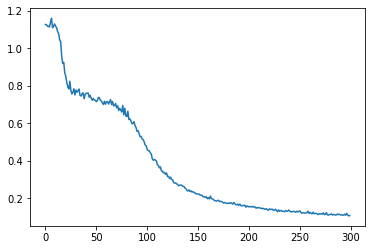

In [60]:
plt.plot(loss_list)